In [ ]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 40s 51ms/step - loss: 0.1969 - accuracy: 0.9419 - val_loss: 0.0774 - val_accuracy: 0.9773
Epoch 2/5
750/750 [==============================] - 38s 51ms/step - loss: 0.0649 - accuracy: 0.9811 - val_loss: 0.0605 - val_accuracy: 0.9835
Epoch 3/5
750/750 [==============================] - 30s 40ms/step - loss: 0.0422 - accuracy: 0.9870 - val_loss: 0.0570 - val_accuracy: 0.9836
Epoch 4/5
750/750 [==============================] - 29s 38ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 0.0518 - val_accuracy: 0.9843
Epoch 5/5
313/313 [==============================] - 2s 6ms/step - loss: 0.0466 - accuracy: 0.9841
Test accuracy: 0.9841
313/313 [==============================] - 2s 6ms/step


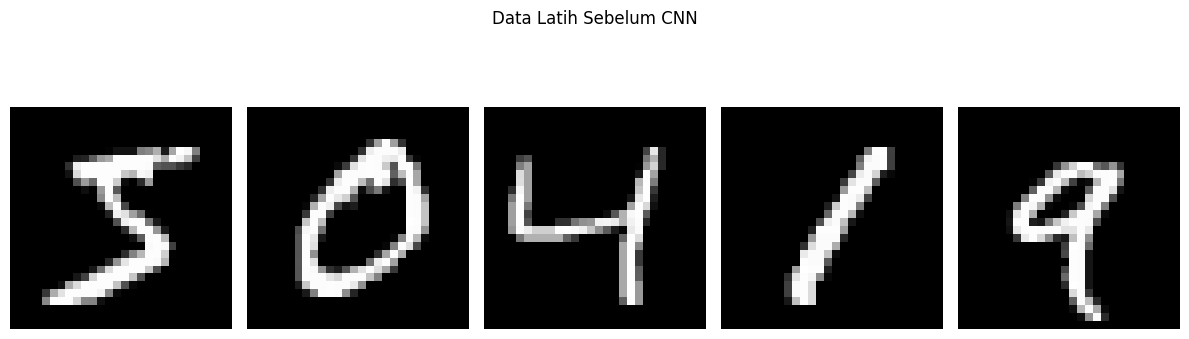

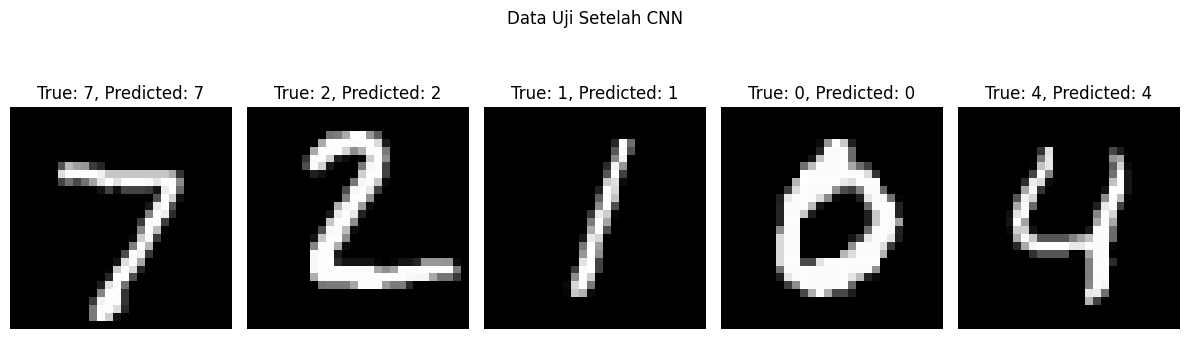

In [ ]:
# Memuat dataset MNIST sebagai contoh
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Visualisasi data sebelum proses CNN
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.suptitle('Data Latih Sebelum CNN')

# Normalisasi dan reshape data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Melatih model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

plt.tight_layout()

# Evaluasi model pada data uji
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Prediksi dan visualisasi model
predictions = model.predict(X_test)

# Visualisasi data setelah proses CNN
num_samples = 5
plt.figure(figsize=(12, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    true_label = np.argmax(y_test[i])
    predicted_label = np.argmax(predictions[i])
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
plt.suptitle('Data Uji Setelah CNN')

plt.tight_layout()
plt.show()